# Credit default rate study

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_excel("datasets/default of credit card clients.xls")

In [3]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Preprocessing 

In [4]:
df.columns[0]

'Unnamed: 0'

In [5]:
#Renaming column name
dict = {}
for x in range(len(df.loc[0,])):
    dict[df.columns[x]] = df.loc[0,][x]
    

In [6]:
dict

{'Unnamed: 0': 'ID',
 'X1': 'LIMIT_BAL',
 'X2': 'SEX',
 'X3': 'EDUCATION',
 'X4': 'MARRIAGE',
 'X5': 'AGE',
 'X6': 'PAY_0',
 'X7': 'PAY_2',
 'X8': 'PAY_3',
 'X9': 'PAY_4',
 'X10': 'PAY_5',
 'X11': 'PAY_6',
 'X12': 'BILL_AMT1',
 'X13': 'BILL_AMT2',
 'X14': 'BILL_AMT3',
 'X15': 'BILL_AMT4',
 'X16': 'BILL_AMT5',
 'X17': 'BILL_AMT6',
 'X18': 'PAY_AMT1',
 'X19': 'PAY_AMT2',
 'X20': 'PAY_AMT3',
 'X21': 'PAY_AMT4',
 'X22': 'PAY_AMT5',
 'X23': 'PAY_AMT6',
 'Y': 'default payment next month'}

In [7]:
df.rename(columns=dict,inplace=True)

In [8]:
#Dropping first row
df.drop(0,inplace=True)
df.reset_index(inplace=True)

In [9]:
#Dropping index & ID columns
df.drop(['ID'],inplace=True,axis=1)

In [10]:
df

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
df.isnull().sum()

index                         0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
df.dtypes

index                          int64
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

### Data Analysis

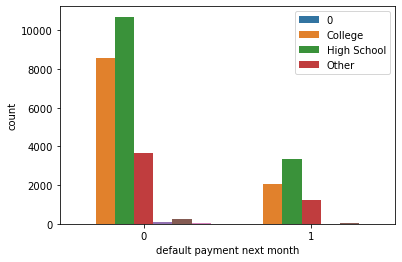

In [13]:
#Default rate based on education 
sns.countplot(data=df,x='default payment next month',hue='EDUCATION')
plt.legend([0,'College','High School','Other'])


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

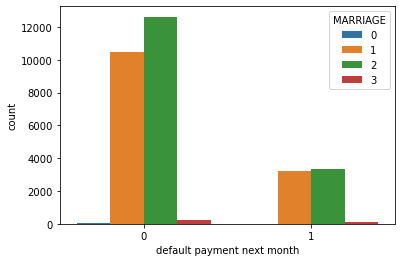

In [14]:
#Default rate based on mariage
sns.countplot(data=df,x='default payment next month',hue='MARRIAGE')

In [15]:
#Calculate total late time 
df['Total Late'] = sum([df['PAY_0'],df['PAY_2'],df['PAY_3'],df['PAY_4'],df['PAY_5'],df['PAY_6']])

In [16]:
#Deviding total late time to brackets 
df['Late Brackets'] = pd.cut(df['Total Late'],bins = [min(df['Total Late']),0,3,6,12,max(df['Total Late'])], labels=['No Late', '1 Quarter', '2 Quarters', '< 1 Year','> 1 Year'])

Text(0.5, 1.0, 'Default rate on total late time')

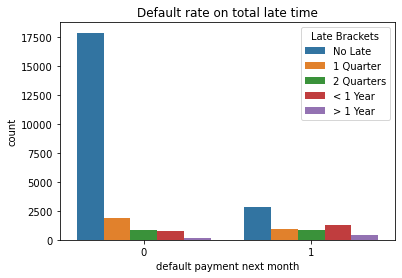

In [17]:
sns.countplot(data=df,x='default payment next month',hue='Late Brackets')
plt.title('Default rate on total late time')

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

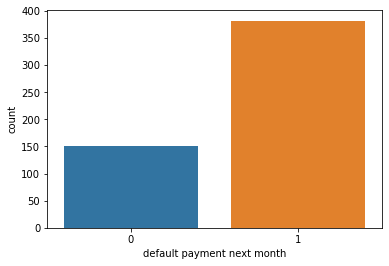

In [18]:
#Looking deeper into late time for more than 1 year late
sns.countplot(data=df[df['Late Brackets']=='> 1 Year'],x='default payment next month')


For people who have their payment late for more than 1 year, the rate of defaulting is more than not. This applies to less than 1 year and 2 quarters late as well.

In [19]:
df.columns

Index(['index', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Total Late', 'Late Brackets'],
      dtype='object')

In [20]:
#Calculating total credit and total paid 
df['Total Credit']= sum([df['BILL_AMT1'],df['BILL_AMT2'],df['BILL_AMT3'],df['BILL_AMT4'],df['BILL_AMT5'],df['BILL_AMT6']])

In [21]:
df['Total Paid'] = sum([df['PAY_AMT1'],df['PAY_AMT2'],df['PAY_AMT3'],df['PAY_AMT4'],df['PAY_AMT5'],df['PAY_AMT6']])

In [22]:
df['Total Credit'].value_counts()

0         870
2340       58
2500       33
14400      29
1950       25
         ... 
177455      1
16406       1
167946      1
49436       1
230874      1
Name: Total Credit, Length: 27370, dtype: int64

In [23]:
df['Percent Paid'] = df['Total Credit']

### Using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from numpy import argmax

In [25]:
X = pd.get_dummies(df.drop("default payment next month", axis = 1), columns = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",'Late Brackets'], drop_first = True)
y = df["default payment next month"]
y = y.astype('int')

In [26]:
X

,index,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,Late Brackets_1 Quarter,Late Brackets_2 Quarters,Late Brackets_< 1 Year,Late Brackets_> 1 Year
0,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,0,0,0,1,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,0,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,0,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,188948,192815,208365,88004,31237,15980,8500,...,0,0,0,0,0,0,0,0,0,0
29996,29997,150000,43,1683,1828,3502,8979,5190,0,1837,...,0,0,0,0,0,0,0,0,0,0
29997,29998,30000,37,3565,3356,2758,20878,20582,19357,0,...,0,0,0,0,0,0,0,0,1,0
29998,29999,80000,41,-1645,78379,76304,52774,11855,48944,85900,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# 80-10-10
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)
X_train1, X_tuning1, y_train1, y_tuning1 = train_test_split(X_train1, y_train1, test_size = 0.1/0.8, random_state = 42, stratify = y_train1)

In [34]:
# 80-15-5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.05, random_state = 42, stratify = y)
X_train2, X_tuning2, y_train2, y_tuning2 = train_test_split(X_train2, y_train2, test_size = 0.15/0.80, random_state = 42, stratify = y_train2)

In [35]:
# 50-25-25
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
X_train3, X_tuning3, y_train3, y_tuning3 = train_test_split(X_train3, y_train3, test_size = 0.25/0.50, random_state = 42, stratify = y_train3)

#### No tuning 

In [36]:
LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train1, y_train1)

y_pred = LR.predict(X_test1)

print("accuracy =", accuracy_score(y_test1, y_pred))
print("confusion_matrix =\n", confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("f1 score=",f1_score(y_test1, y_pred))

accuracy = 0.7786666666666666
confusion_matrix =
 [[2336    0]
 [ 664    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2336
           1       0.00      0.00      0.00       664

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.68      3000

f1 score= 0.0


c:\Users\lekha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lekha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lekha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model predicted all credit holders to not default on their credit, which makes no sense in a real world situation

#### With Tuning 

In [37]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype("int")

#### Testing: 80, Tuning: 10, Testing: 10

In [38]:
# 80-10-10
#Use fit_transform for training data and transform for others
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

LR1 = LogisticRegression(max_iter = 10000)
LR1.fit(X_train_scaled, y_train1) 

LogisticRegression(max_iter=10000)

Best Threshold = 0.30453350326653617, F-Score = 0.5475862068965518


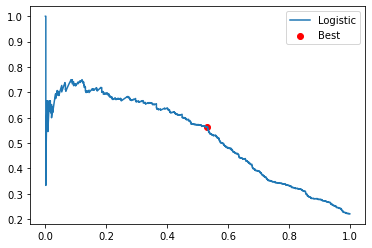

In [39]:
predictProba = LR1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [40]:
predictProba = LR1.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", precision_score(y_test1, y_pred))
print("recall score =", recall_score(y_test1, y_pred))
print("f1 score =", f1_score(y_test1, y_pred))

accuracy score = 0.804
confusion matrix
 [[2086  250]
 [ 338  326]]
precision score = 0.5659722222222222
recall score = 0.49096385542168675
f1 score = 0.5258064516129032


##### Train size: 80 ; Tuning: 15; Test: 5

In [41]:
#80-15-5
#Use fit_transform for training data and transform for others
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)
X_tuning2_scaled = scaler.transform(X_tuning2)

LR2 = LogisticRegression(max_iter = 10000)
LR2.fit(X_train2_scaled, y_train2) 

LogisticRegression(max_iter=10000)

Best Threshold = 0.23674624762287355, F-Score = 0.5387948011027963


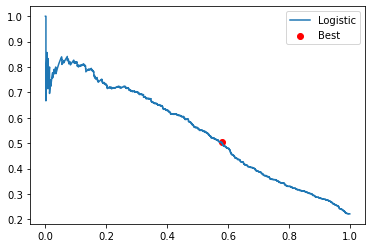

In [42]:
predictProba = LR2.predict_proba(X_tuning2_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [43]:
predictProba = LR2.predict_proba(X_test2_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test2, y_pred))
print("confusion matrix\n", confusion_matrix(y_test2, y_pred))
print("precision score =", precision_score(y_test2, y_pred))
print("recall score =", recall_score(y_test2, y_pred))
print("f1 score =", f1_score(y_test2, y_pred))

accuracy score = 0.778
confusion matrix
 [[981 187]
 [146 186]]
precision score = 0.49865951742627346
recall score = 0.5602409638554217
f1 score = 0.5276595744680851


##### Training: 50; Tuning: 25; Testing: 25

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)
X_tuning3_scaled = scaler.transform(X_tuning3) 

LR3 = LogisticRegression(max_iter = 10000)
LR3.fit(X_train3_scaled,y_train3)

LogisticRegression(max_iter=10000)

Best Threshold = 0.28144202215661984, F-Score = 0.5379446640316206


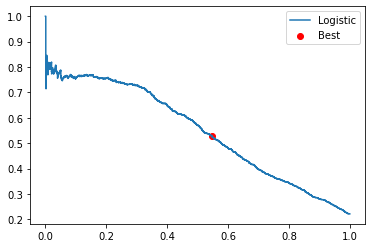

In [45]:
predictProba = LR3.predict_proba(X_tuning3_scaled)[:,1]
precision, recall, thresholds = precision_recall_curve(y_tuning3,predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
#locate the index of the largest f score
ix = argmax(fSscores)

#plot the roc curve for the model
plt.plot(recall,precision,label = 'Logistic')
plt.scatter(recall[ix],precision[ix],marker='o',color='red',label='Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix],fSscores[ix]))

In [46]:
predictProba = LR3.predict_proba(X_test3_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test3, y_pred))
print("confusion matrix\n", confusion_matrix(y_test3, y_pred))
print("precision score =", precision_score(y_test3, y_pred))
print("recall score =", recall_score(y_test3, y_pred))
print("f1 score =", f1_score(y_test3, y_pred))

accuracy score = 0.7852
confusion matrix
 [[5027  814]
 [ 797  862]]
precision score = 0.5143198090692124
recall score = 0.5195901145268234
f1 score = 0.5169415292353823


### Takeaway: 

Use a tuning set, get the threshold that yields the highest f1score. The probability higher than that threshold should be 1 

### K-Nearest Neighbor


#### With no tuning

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test1)

In [50]:
#Just using the available library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
# Summary of the predictions made by the classifier
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))
# Accuracy score
print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", precision_score(y_test1, y_pred))
print("recall score =", recall_score(y_test1, y_pred))
print("f1 score =", f1_score(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2336
           1       0.39      0.18      0.25       664

    accuracy                           0.76      3000
   macro avg       0.60      0.55      0.55      3000
weighted avg       0.71      0.76      0.72      3000

[[2153  183]
 [ 545  119]]
accuracy score = 0.7573333333333333
confusion matrix
 [[2153  183]
 [ 545  119]]
precision score = 0.39403973509933776
recall score = 0.17921686746987953
f1 score = 0.24637681159420288


Running the knn Machine Learning Model on no tuning set give low f1 score, with low precision and recall score

#### Finding optimal k-number

In [53]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#Testing for different k from 1 to 25:
dict = {}
for x in np.arange(1,25):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train1, y_train1)
    y_pred = knn.predict(X_test1)
    dict[x] = f1_score(y_test1, y_pred)



In [57]:
max(dict.values())

0.2770897832817338

The best f1 score can be achieved when k = 1 

#### With Tuning

3 kinds of data division has been done in the previous parts, here will only be for running the ML models

In [62]:
#### Training: 80, Tuning: 10, Testing: 10

Best Threshold = 1.0, F-Score = 0.3920792079207921


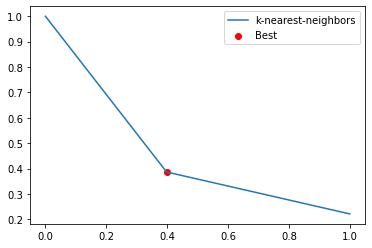

In [61]:
KNN1 = KNeighborsClassifier(n_neighbors=1)
KNN1.fit(X_train_scaled, y_train1)

predictProba = KNN1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'k-nearest-neighbors')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))